In [4]:
import kagglehub

# Download latest version
path = kagglehub.dataset_download("navjotkaushal/coffee-sales-dataset")

print("Path to dataset files:", path)

Using Colab cache for faster access to the 'coffee-sales-dataset' dataset.
Path to dataset files: /kaggle/input/coffee-sales-dataset


In [5]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from io import StringIO

df = pd.read_csv("/kaggle/input/coffee-sales-dataset/Coffe_sales.csv")
df.head(5)

,hour_of_day,cash_type,money,coffee_name,Time_of_Day,Weekday,Month_name,Weekdaysort,Monthsort,Date,Time
0,10,card,38.7,Latte,Morning,Fri,Mar,5,3,2024-03-01,10:15:50.520000
1,12,card,38.7,Hot Chocolate,Afternoon,Fri,Mar,5,3,2024-03-01,12:19:22.539000
2,12,card,38.7,Hot Chocolate,Afternoon,Fri,Mar,5,3,2024-03-01,12:20:18.089000
3,13,card,28.9,Americano,Afternoon,Fri,Mar,5,3,2024-03-01,13:46:33.006000
4,13,card,38.7,Latte,Afternoon,Fri,Mar,5,3,2024-03-01,13:48:14.626000


# **Exploratory Data Analysis (EDA)**

In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3547 entries, 0 to 3546
Data columns (total 11 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   hour_of_day  3547 non-null   int64  
 1   cash_type    3547 non-null   object 
 2   money        3547 non-null   float64
 3   coffee_name  3547 non-null   object 
 4   Time_of_Day  3547 non-null   object 
 5   Weekday      3547 non-null   object 
 6   Month_name   3547 non-null   object 
 7   Weekdaysort  3547 non-null   int64  
 8   Monthsort    3547 non-null   int64  
 9   Date         3547 non-null   object 
 10  Time         3547 non-null   object 
dtypes: float64(1), int64(3), object(7)
memory usage: 304.9+ KB


In [11]:
print(df.shape)

(3547, 11)


In [12]:
print(df.dtypes)

hour_of_day      int64
cash_type       object
money          float64
coffee_name     object
Time_of_Day     object
Weekday         object
Month_name      object
Weekdaysort      int64
Monthsort        int64
Date            object
Time            object
dtype: object


In [13]:
print(df.isnull().sum())

hour_of_day    0
cash_type      0
money          0
coffee_name    0
Time_of_Day    0
Weekday        0
Month_name     0
Weekdaysort    0
Monthsort      0
Date           0
Time           0
dtype: int64


In [14]:
print(df.duplicated().sum())

0


In [15]:
print(df.describe())

       hour_of_day        money  Weekdaysort    Monthsort
count  3547.000000  3547.000000  3547.000000  3547.000000
mean     14.185791    31.645216     3.845785     6.453905
std       4.234010     4.877754     1.971501     3.500754
min       6.000000    18.120000     1.000000     1.000000
25%      10.000000    27.920000     2.000000     3.000000
50%      14.000000    32.820000     4.000000     7.000000
75%      18.000000    35.760000     6.000000    10.000000
max      22.000000    38.700000     7.000000    12.000000


In [19]:
print(df.columns.tolist())

['hour_of_day', 'cash_type', 'money', 'coffee_name', 'Time_of_Day', 'Weekday', 'Month_name', 'Weekdaysort', 'Monthsort', 'Date', 'Time']


In [20]:
print(df['Weekday'].unique())

['Fri' 'Sat' 'Sun' 'Mon' 'Tue' 'Wed' 'Thu']


In [21]:
print(df['Month_name'].unique())

['Mar' 'Apr' 'May' 'Jun' 'Jul' 'Aug' 'Sep' 'Oct' 'Nov' 'Dec' 'Jan' 'Feb']


In [22]:
print(df['coffee_name'].unique())

['Latte' 'Hot Chocolate' 'Americano' 'Americano with Milk' 'Cocoa'
 'Cortado' 'Espresso' 'Cappuccino']


In [23]:
df['DateTime'] = pd.to_datetime(df['Date'])
df['DateTime']

,DateTime
0,2024-03-01
1,2024-03-01
2,2024-03-01
3,2024-03-01
4,2024-03-01
...,...
3542,2025-03-23
3543,2025-03-23
3544,2025-03-23
3545,2025-03-23


In [25]:
df.head()

,hour_of_day,cash_type,money,coffee_name,Time_of_Day,Weekday,Month_name,Weekdaysort,Monthsort,Date,Time,DateTime
0,10,card,38.7,Latte,Morning,Fri,Mar,5,3,2024-03-01,10:15:50.520000,2024-03-01
1,12,card,38.7,Hot Chocolate,Afternoon,Fri,Mar,5,3,2024-03-01,12:19:22.539000,2024-03-01
2,12,card,38.7,Hot Chocolate,Afternoon,Fri,Mar,5,3,2024-03-01,12:20:18.089000,2024-03-01
3,13,card,28.9,Americano,Afternoon,Fri,Mar,5,3,2024-03-01,13:46:33.006000,2024-03-01
4,13,card,38.7,Latte,Afternoon,Fri,Mar,5,3,2024-03-01,13:48:14.626000,2024-03-01


In [94]:
df['Weekday'] = df['DateTime'].dt.day_name().str[:3]   # ให้เป็น 'Mon', 'Tue', 'Wed' ...

# บังคับลำดับวัน
ordered_days = ['Mon', 'Tue', 'Wed', 'Thu', 'Fri', 'Sat', 'Sun']
df['Weekday'] = pd.Categorical(df['Weekday'], categories=ordered_days, ordered=True)
print(df['Weekday'].unique())

['Fri', 'Sat', 'Sun', 'Mon', 'Tue', 'Wed', 'Thu']
Categories (7, object): ['Mon' < 'Tue' < 'Wed' < 'Thu' < 'Fri' < 'Sat' < 'Sun']


# **1. Total Selling Coffee Types**

In [26]:
coffee_sales = df.groupby('coffee_name').agg({
    'money': ['count', 'sum', 'mean']
}).round(2)
coffee_sales.columns = ['Quantity_Sold', 'Total_Revenue', 'Average_Price']
coffee_sales = coffee_sales.sort_values('Quantity_Sold', ascending=False)

print("=" * 50)
print("Total Selling Coffee Types")
print("=" * 50)
print(coffee_sales)

Total Selling Coffee Types
                     Quantity_Sold  Total_Revenue  Average_Price
coffee_name                                                     
Americano with Milk            809       24751.12          30.59
Latte                          757       26875.30          35.50
Americano                      564       14650.26          25.98
Cappuccino                     486       17439.14          35.88
Cortado                        287        7384.86          25.73
Hot Chocolate                  276        9933.46          35.99
Cocoa                          239        8521.16          35.65
Espresso                       129        2690.28          20.85


# **2. Sales by Coffee Type**


1. Top Coffee Types by Revenue and Quantity

In [56]:
# Best menu by Quantity
menu_sales = df['coffee_name'].value_counts()
best_menu_qty = menu_sales.idxmax()
best_menu_qty_count = menu_sales.max()

# Best menu by Revenue
menu_revenue = df.groupby('coffee_name')['money'].sum()
best_menu_rev = menu_revenue.idxmax()
best_menu_rev_val = menu_revenue.max()

print("=" * 50)
print("BEST-SELLING MENU SUMMARY ")
print("=" * 50)
print(f"By Quantity : {best_menu_qty} - {best_menu_qty_count} Units")
print(f"By Revenue  : {best_menu_rev} - ${best_menu_rev_val:,.0f} USD")


BEST-SELLING MENU SUMMARY 
By Quantity : Americano with Milk - 809 Units
By Revenue  : Latte - $26,875 USD


<Figure size 1000x600 with 0 Axes>

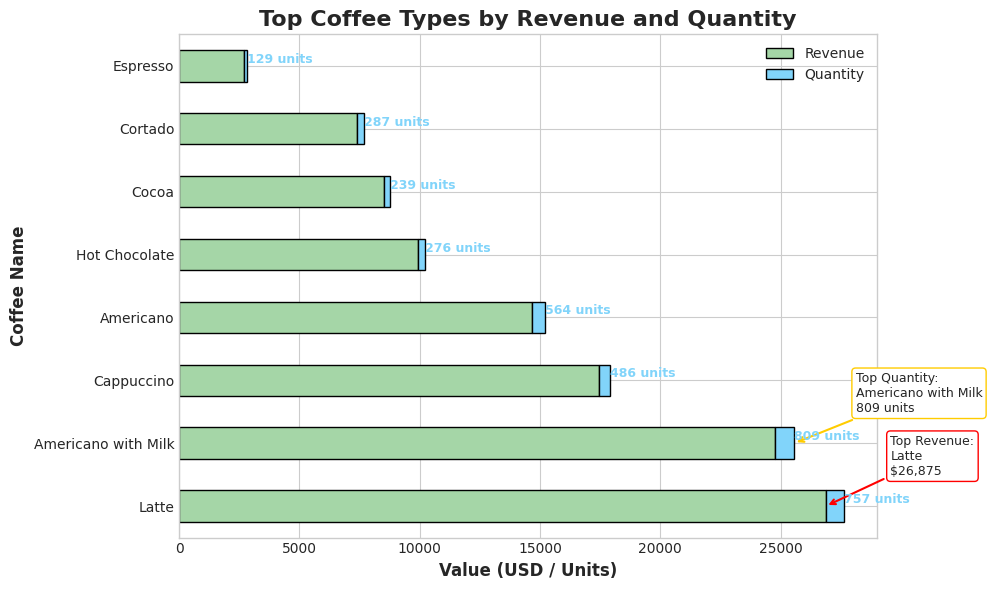

Top Coffee Types by Revenue and Quantity
Top-selling coffee by quantity: Americano with Milk - 809 Units
Top-selling coffee by revenue: Latte - $26,875 USD


In [143]:
import matplotlib.pyplot as plt
import pandas as pd

# Aggregate revenue and quantity per coffee
coffee_revenue = df.groupby('coffee_name')['money'].sum()
coffee_quantity = df.groupby('coffee_name')['coffee_name'].count()

# Combine Revenue + Quantity into DataFrame
coffee_stats = (
    pd.DataFrame({
        'Revenue': coffee_revenue,
        'Quantity': coffee_quantity
    })
    .sort_values('Revenue', ascending=False)
)

# Plot stacked bar chart
plt.figure(figsize=(10, 6))
coffee_stats.plot(
    kind='barh',
    stacked=True,
    color=['#A5D6A7', '#81D4FA'],
    edgecolor='black',
    figsize=(10, 6)
)

# Titles and Labels
plt.title('Top Coffee Types by Revenue and Quantity', fontsize=16, fontweight='bold')
plt.xlabel('Value (USD / Units)', fontsize=12, fontweight='bold' )
plt.ylabel('Coffee Name', fontsize=12, fontweight='bold')

# Annotation: Top Revenue
top_revenue = coffee_stats['Revenue'].idxmax()
top_revenue_val = coffee_stats.loc[top_revenue, 'Revenue']
plt.annotate(
    f"Top Revenue:\n{top_revenue}\n${top_revenue_val:,.0f}",
    xy=(top_revenue_val, list(coffee_stats.index).index(top_revenue)),
    xytext=(top_revenue_val * 1.1, list(coffee_stats.index).index(top_revenue) +0.5),
    arrowprops=dict(arrowstyle='->', color="red", lw=1.5),
    fontsize=9,
    bbox=dict(boxstyle="round,pad=0.3", fc="white", ec="red", lw=1)
)

# Annotation: Top Quantity
top_quantity = coffee_stats['Quantity'].idxmax()
top_quantity_val = coffee_stats.loc[top_quantity, 'Quantity']
plt.annotate(
    f"Top Quantity:\n{top_quantity}\n{top_quantity_val} units",
    xy=(coffee_stats.loc[top_quantity].sum(), list(coffee_stats.index).index(top_quantity)),
    xytext=(coffee_stats.loc[top_quantity].sum() * 1.1, list(coffee_stats.index).index(top_quantity) + 0.50),
    arrowprops=dict(arrowstyle='->', color="#FFCC00", lw=1.5),
    fontsize=9,
    bbox=dict(boxstyle="round,pad=0.3", fc="white", ec="#FFCC00", lw=1)
)

for i, (rev, qty) in enumerate(zip(coffee_stats['Revenue'], coffee_stats['Quantity'])):
    mid_point = qty + rev
    plt.text(mid_point, i, f"{qty} units", va='bottom', ha='left',
             fontsize=9, color='#81D4FA', fontweight="bold")


plt.tight_layout()
plt.show()

print("=" * 50)
print("Top Coffee Types by Revenue and Quantity")
print("=" * 50)
print(f"Top-selling coffee by quantity: {top_quantity} - {top_quantity_val} Units")
print(f"Top-selling coffee by revenue: {top_revenue} - ${top_revenue_val:,.0f} USD")


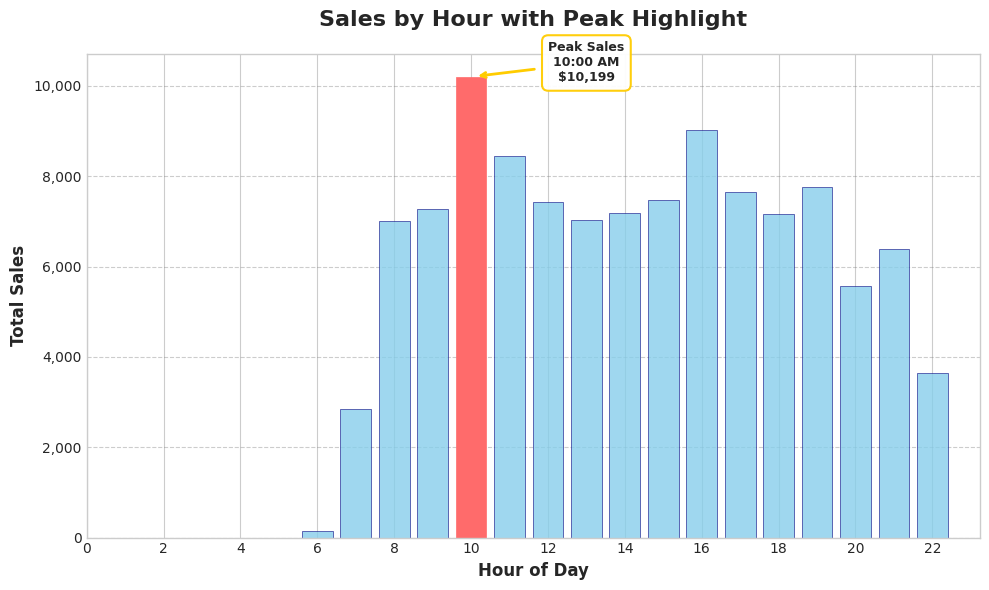

Sales by Hour with Peak Highlight
Peak Time sales : 10:00 AM
Peak sales amount: $10,199 USD
This represents 9.1% of total sales


In [ ]:
# Find the hour with the best sales
sales_by_hour = df.groupby('hour_of_day')['money'].sum().sort_index()
best_hour = sales_by_hour.idxmax()
best_sales = sales_by_hour.max()

# Create the plot
plt.figure(figsize=(10, 6))
bars = plt.bar(sales_by_hour.index, sales_by_hour.values,
               color='skyblue', alpha=0.8, edgecolor='navy', linewidth=0.5)

# Highlight the peak hour with different color
peak_position = list(sales_by_hour.index).index(best_hour)
bars[peak_position].set_color('#FF6B6B')
bars[peak_position].set_alpha(1.0)

# Add annotation
# Add annotation for the best selling hour
plt.annotate(f'Peak Sales\n{best_hour}:00 AM\n${best_sales:,.0f}',
             xy=(best_hour, best_sales), xytext=(best_hour + 3, best_sales - max(sales_by_hour) * -0.03),
             arrowprops=dict(arrowstyle='->', color='#FFCC00', lw=2, shrinkA=5, shrinkB=5),
             fontsize=9, ha='center', va='center', fontweight='bold',
             bbox=dict(boxstyle='round,pad=0.5', facecolor='white',
                       alpha=0.95, edgecolor='#FFCC00', linewidth=1.5))

# Customize the plot
plt.title('Sales by Hour with Peak Highlight',
          fontsize=16, fontweight='bold', pad=20)
plt.xlabel('Hour of Day', fontsize=12, fontweight='bold')
plt.ylabel('Total Sales', fontsize=12, fontweight='bold') # Updated label

# Set x-axis ticks
plt.xticks(range(0, 24, 2), fontsize=10)
plt.yticks(fontsize=10)

# Add grid
plt.grid(axis='y', linestyle='--', alpha=0.4, color='gray')

# Format y-axis to show currency
ax = plt.gca()
ax.yaxis.set_major_formatter(plt.FuncFormatter(lambda x, p: f'{x:,.0f}'))

# Add some styling
plt.tight_layout()
plt.show()

# Print summary
print("=" * 50)
print("Sales by Hour with Peak Highlight")
print("=" * 50)
print(f"Peak Time sales : {best_hour}:00 AM")
print(f"Peak sales amount: ${best_sales:,.0f} USD")
print(f"This represents {(best_sales/sales_by_hour.sum())*100:.1f}% of total sales")

2.  Sales by Hour with Peak Highlight

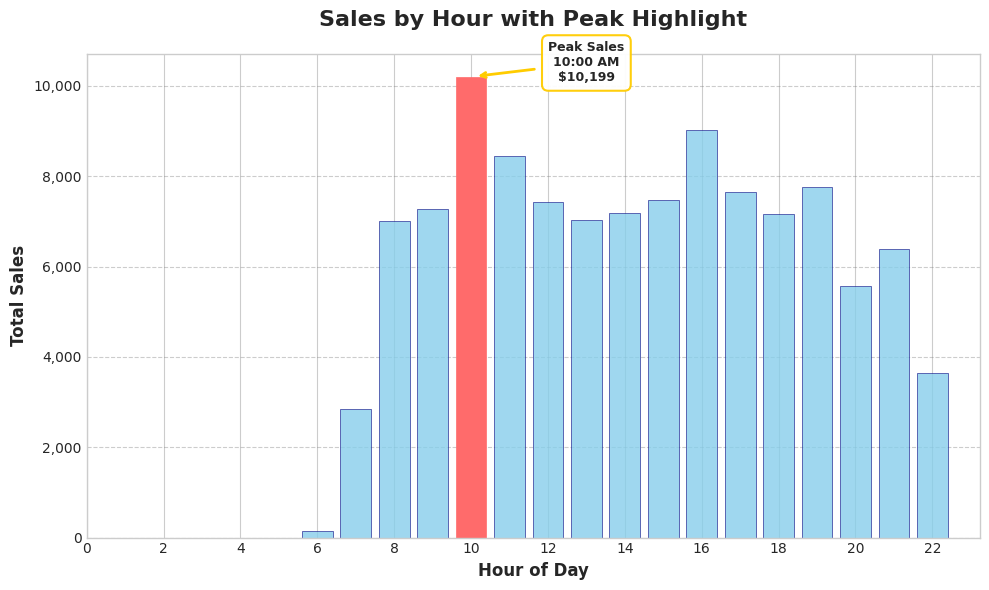

Sales by Hour with Peak Highlight
Peak Time sales : 10:00 AM
Peak sales amount: $10,199 USD
This represents 9.1% of total sales


In [104]:
# Find the hour with the best sales
sales_by_hour = df.groupby('hour_of_day')['money'].sum().sort_index()
best_hour = sales_by_hour.idxmax()
best_sales = sales_by_hour.max()

# Create the plot
plt.figure(figsize=(10, 6))
bars = plt.bar(sales_by_hour.index, sales_by_hour.values,
               color='skyblue', alpha=0.8, edgecolor='navy', linewidth=0.5)

# Highlight the peak hour with different color
peak_position = list(sales_by_hour.index).index(best_hour)
bars[peak_position].set_color('#FF6B6B')
bars[peak_position].set_alpha(1.0)

# Add annotation
# Add annotation for the best selling hour
plt.annotate(f'Peak Sales\n{best_hour}:00 AM\n${best_sales:,.0f}',
             xy=(best_hour, best_sales), xytext=(best_hour + 3, best_sales - max(sales_by_hour) * -0.03),
             arrowprops=dict(arrowstyle='->', color='#FFCC00', lw=2, shrinkA=5, shrinkB=5),
             fontsize=9, ha='center', va='center', fontweight='bold',
             bbox=dict(boxstyle='round,pad=0.5', facecolor='white',
                       alpha=0.95, edgecolor='#FFCC00', linewidth=1.5))

# Customize the plot
plt.title('Sales by Hour with Peak Highlight',
          fontsize=16, fontweight='bold', pad=20)
plt.xlabel('Hour of Day', fontsize=12, fontweight='bold')
plt.ylabel('Total Sales', fontsize=12, fontweight='bold') # Updated label

# Set x-axis ticks
plt.xticks(range(0, 24, 2), fontsize=10)
plt.yticks(fontsize=10)

# Add grid
plt.grid(axis='y', linestyle='--', alpha=0.4, color='gray')

# Format y-axis to show currency
ax = plt.gca()
ax.yaxis.set_major_formatter(plt.FuncFormatter(lambda x, p: f'{x:,.0f}'))

# Add some styling
plt.tight_layout()
plt.show()

# Print summary
print("=" * 50)
print("Sales by Hour with Peak Highlight")
print("=" * 50)
print(f"Peak Time sales : {best_hour}:00 AM")
print(f"Peak sales amount: ${best_sales:,.0f} USD")
print(f"This represents {(best_sales/sales_by_hour.sum())*100:.1f}% of total sales")

3. Coffee Types Distribution by Time of Day

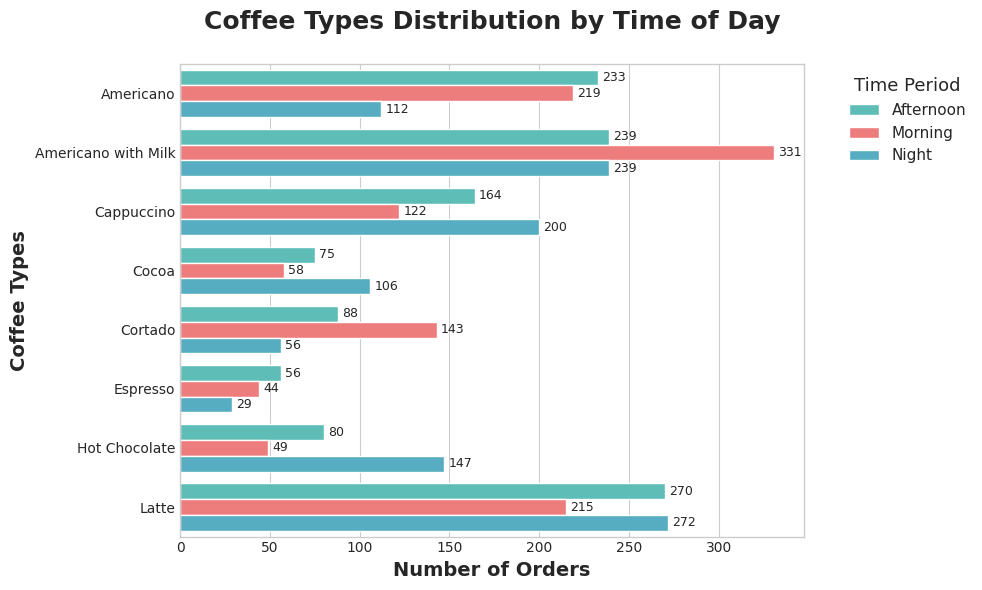

Coffee Distribution Summary
Total coffee types analyzed: 8
Time periods covered: 3
Total orders: $3,547 USD


In [96]:
# Group data to count each coffee type by time of day
coffee_by_time_of_day = df.groupby(['Time_of_Day', 'coffee_name']).size().reset_index(name='count')

# Set up the plot with professional styling
plt.figure(figsize=(10, 6))
sns.set_style("whitegrid")
sns.set_palette("Set2")

# Create horizontal bar plot with enhanced colors
custom_colors = {
    'Morning': '#FF6B6B',
    'Afternoon': '#4ECDC4',
    'Night': '#45B7D1'
}

# Create the plot
ax = sns.barplot(
    x='count',
    y='coffee_name',
    hue='Time_of_Day',
    data=coffee_by_time_of_day,
    palette=custom_colors,
    orient='h'
)

# Enhance plot appearance
plt.title('Coffee Types Distribution by Time of Day',
          fontsize=18, fontweight='bold', pad=25)
plt.xlabel('Number of Orders', fontsize=14, fontweight='bold')
plt.ylabel('Coffee Types', fontsize=14, fontweight='bold')

# Customize legend
plt.legend(title='Time Period', title_fontsize=13, fontsize=11,
          bbox_to_anchor=(1.05, 1), loc='upper left')

# Add value labels on bars
for container in ax.containers:
    ax.bar_label(container, fmt='%d', fontsize=9, padding=3)

# Improve layout
plt.tight_layout()
plt.show()

print("=" * 50)
print("Coffee Distribution Summary")
print("=" * 50)
print(f"Total coffee types analyzed: {coffee_by_time_of_day['coffee_name'].nunique()}")
print(f"Time periods covered: {coffee_by_time_of_day['Time_of_Day'].nunique()}")
print(f"Total orders: ${coffee_by_time_of_day['count'].sum():,} USD")

4. Total Revenue by Time Period

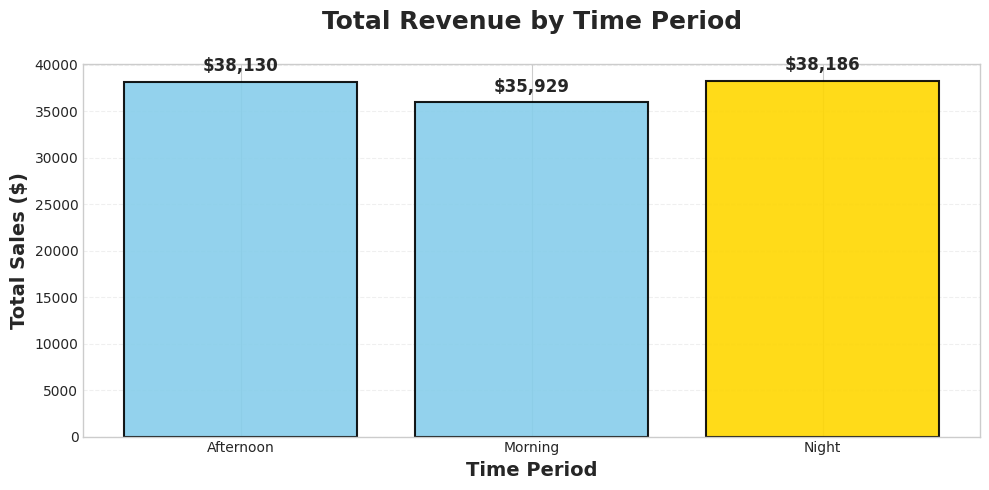

Total Revenue by Time Period
Peak Revenue: Night
Total Sales: $38,186.34 USD


In [97]:
# Calculate sales data
sales_by_time = df.groupby('Time_of_Day').agg({
    'money': 'sum'
}).reset_index()
sales_by_time.columns = ['Time_of_Day', 'Total_Sales']

# Find peak period
peak_period = sales_by_time.loc[sales_by_time['Total_Sales'].idxmax(), 'Time_of_Day']
peak_sales = sales_by_time['Total_Sales'].max()

# Create Revenue Chart
plt.figure(figsize=(10, 5))

# Color scheme with highlighted peak
colors = []
for period in sales_by_time['Time_of_Day']:
    if period == peak_period:
        colors.append('#FFD700')  # Gold for peak
    else:
        colors.append('#87CEEB')  # Light blue for others

bars = plt.bar(sales_by_time['Time_of_Day'], sales_by_time['Total_Sales'],
               color=colors, edgecolor='black', linewidth=1.5, alpha=0.9)

# Customization
plt.title('Total Revenue by Time Period', fontsize=18, fontweight='bold', pad=25)
plt.xlabel('Time Period', fontsize=14, fontweight='bold')
plt.ylabel('Total Sales ($)', fontsize=14, fontweight='bold')
plt.grid(axis='y', alpha=0.3, linestyle='--')

# Add value labels
for i, bar in enumerate(bars):
    height = bar.get_height()
    plt.text(bar.get_x() + bar.get_width()/2., height + height*0.02,
             f'${height:,.0f}', ha='center', va='bottom',
             fontweight='bold', fontsize=12)

plt.tight_layout()
plt.show()

print("=" * 50)
print("Total Revenue by Time Period")
print("=" * 50)
print(f"Peak Revenue: {peak_period}")
print(f"Total Sales: ${peak_sales:,.2f} USD")

5. Total Sales by Weekday

/tmp/ipython-input-516945665.py:9: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  sales_by_weekday = df.groupby('Weekday')['money'].sum()


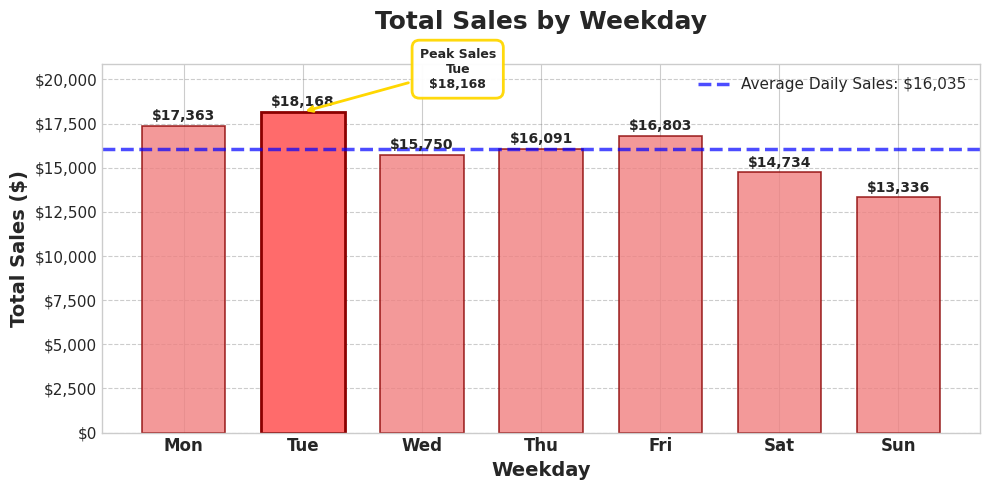

WEEKDAY SALES ANALYSIS
Peak weekday: Tue
Sales: $18,168 USD
Lowest weekday: Sun
Sales: $13,336 USD
Average daily sales: $16,035 USD


In [99]:
import pandas as pd
import matplotlib.pyplot as plt

# Ensure weekdays are ordered properly
ordered_days = ['Mon', 'Tue', 'Wed', 'Thu', 'Fri', 'Sat', 'Sun']
df['Weekday'] = pd.Categorical(df['Weekday'], categories=ordered_days, ordered=True)

# Sales by Weekday
sales_by_weekday = df.groupby('Weekday')['money'].sum()
#sales_by_weekday = (
#    df.groupby('Weekday')['money'].sum()
#      .reindex(['Mon','Tue','Wed','Thu','Fri','Sat','Sun'])
#      .dropna()
#)

# Calculate statistics
best_weekday = sales_by_weekday.idxmax()
best_weekday_sales = sales_by_weekday.max()
average_daily_sales = sales_by_weekday.mean()

# Plot Sales by Weekday
plt.figure(figsize=(10, 5))

# Create bars with improved styling
bars = plt.bar(sales_by_weekday.index, sales_by_weekday.values,
               color='lightcoral', edgecolor='darkred',
               linewidth=1.2, width=0.7, alpha=0.8)

# Highlight best weekday
peak_pos = list(sales_by_weekday.index).index(best_weekday)
bars[peak_pos].set_color('#FF6B6B')
bars[peak_pos].set_alpha(1.0)
bars[peak_pos].set_edgecolor('darkred')
bars[peak_pos].set_linewidth(2)

# Add value labels on all bars
for i, bar in enumerate(bars):
    height = bar.get_height()
    plt.text(bar.get_x() + bar.get_width()/2., height + height*0.01,
             f'${height:,.0f}', ha='center', va='bottom',
             fontweight='bold', fontsize=10)

# Smart annotation positioning
max_sales = sales_by_weekday.max()
min_sales = sales_by_weekday.min()
y_range = max_sales - min_sales

# Adjust annotation position based on peak location
if peak_pos <= 3:  # If peak is in first half, annotate to the right
    x_offset = 1.2
    arrow_color = 'lightcoral'
else:  # If peak is in second half, annotate to the left
    x_offset = -1.2
    arrow_color = 'lightcoral'

plt.annotate(
    f'Peak Sales\n{best_weekday}\n${best_weekday_sales:,.0f}',
    xy=(peak_pos, best_weekday_sales),
    xytext=(peak_pos + x_offset +0.1, best_weekday_sales + y_range*0.5),
    arrowprops=dict(arrowstyle='->', color='#FFD700', lw=2),
    fontsize=9, ha='center', va='center', fontweight='bold',
    bbox=dict(boxstyle='round,pad=0.6', facecolor='white',
              alpha=0.95, edgecolor='#FFD700', linewidth=2)
)

# Customize plot appearance
plt.title('Total Sales by Weekday', fontsize=18, fontweight='bold', pad=25)
plt.xlabel('Weekday', fontsize=14, fontweight='bold')
plt.ylabel('Total Sales ($)', fontsize=14, fontweight='bold')

# Add average line with better styling
plt.axhline(y=average_daily_sales, color='blue', linestyle='--',
           linewidth=2.5, alpha=0.7,
           label=f'Average Daily Sales: ${average_daily_sales:,.0f}')

# Improve grid and styling
plt.grid(axis='y', linestyle='--', alpha=0.4, color='gray')
plt.xticks(fontsize=12, fontweight='bold')
plt.yticks(fontsize=11)

# Enhanced legend
plt.legend(loc='upper right', fontsize=11, framealpha=0.9,
          facecolor='white', edgecolor='gray')

# Format y-axis as currency
ax = plt.gca()
ax.yaxis.set_major_formatter(plt.FuncFormatter(lambda x, p: f'${x:,.0f}'))

# Add some padding to y-axis
y_max = sales_by_weekday.max()
plt.ylim(0, y_max * 1.15)

plt.tight_layout()
plt.show()

# Enhanced summary statistics
print("=" * 50)
print("WEEKDAY SALES ANALYSIS")
print("=" * 50)
print(f"Peak weekday: {best_weekday}")
print(f"Sales: ${best_weekday_sales:,.0f} USD")


# Find lowest performing day
worst_weekday = sales_by_weekday.idxmin()
worst_weekday_sales = sales_by_weekday.min()
print(f"Lowest weekday: {worst_weekday}")
print(f"Sales: ${worst_weekday_sales:,.0f} USD")
print(f"Average daily sales: ${average_daily_sales:,.0f} USD")

6. Total Sales by Month

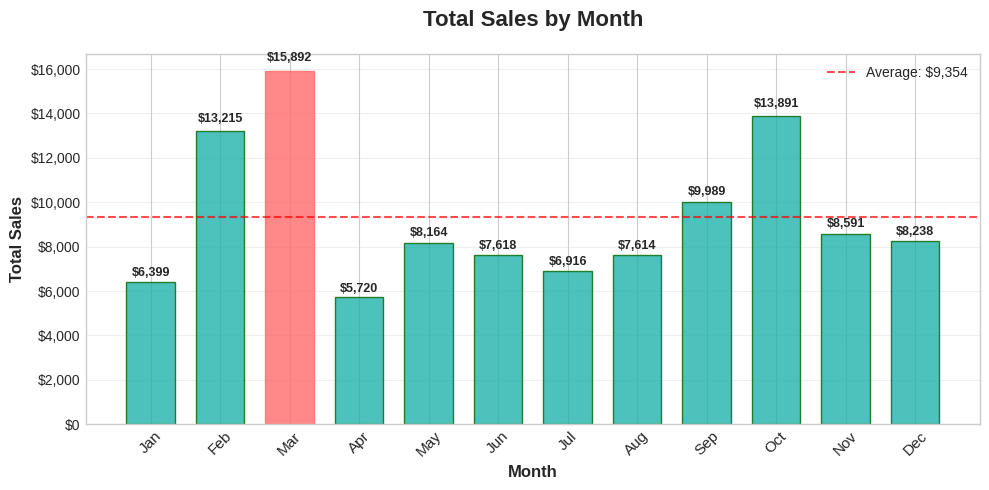

Total Sales by Month
Peak month: Mar - $15,892 USD
Average monthly: $9,354 USD


In [89]:
# Simple improved version
sales_by_month = df.groupby('Month_name')['money'].sum().reindex(
    ['Jan','Feb','Mar','Apr','May','Jun','Jul','Aug','Sep','Oct','Nov','Dec']).dropna()

best_month = sales_by_month.idxmax()
best_month_sales = sales_by_month.max()
average_monthly_sales = sales_by_month.mean()

plt.figure(figsize=(10, 5))

# Create bars with better colors
bars = plt.bar(sales_by_month.index, sales_by_month.values,
               color='lightseagreen', edgecolor='darkgreen',
               linewidth=1, alpha=0.8, width=0.7)

# Highlight peak month
peak_pos = list(sales_by_month.index).index(best_month)
bars[peak_pos].set_color('#FF6B6B')

# Add value labels
for bar in bars:
    height = bar.get_height()
    plt.text(bar.get_x() + bar.get_width()/2., height + height*0.02,
             f'${height:,.0f}', ha='center', va='bottom',
             fontweight='bold', fontsize=9)

# Simple peak annotation
plt.title('Total Sales by Month', fontsize=16, fontweight='bold', pad=20)
plt.xlabel('Month', fontsize=12, fontweight='bold')
plt.ylabel('Total Sales', fontsize=12, fontweight='bold')

# Add average line
plt.axhline(y=average_monthly_sales, color='red', linestyle='--', alpha=0.7,
           label=f'Average: ${average_monthly_sales:,.0f}')

plt.xticks(rotation=45, fontsize=11)
plt.grid(axis='y', alpha=0.3)
plt.legend()

ax = plt.gca()
ax.yaxis.set_major_formatter(plt.FuncFormatter(lambda x, p: f'${x:,.0f}'))

plt.tight_layout()
plt.show()

print("=" * 50)
print("Total Sales by Month")
print("=" * 50)
print(f"Peak month: {best_month} - ${best_month_sales:,.0f} USD")
print(f"Average monthly: ${average_monthly_sales:,.0f} USD")

7. Payment Method Breakdown (cash vs card usage)

In [64]:
# 1. Check all possible values in the 'cash_type' column
payment_methods = df['cash_type'].unique()
print(f"All Observed Payment Types: {payment_methods}")

# 2. Count the number of records for each payment type
payment_counts = df['cash_type'].value_counts()

# 3. Create DataFrame to display results as a summary table
summary_table = pd.DataFrame({
    'Payment Method': payment_counts.index,
    'Transaction Count': payment_counts.values
})

# 4. Calculate percentage
total_transactions = len(df)
summary_table['Percentage (%)'] = (summary_table['Transaction Count'] / total_transactions) * 100

# 5. Format the table with tabulate for better appearance
from tabulate import tabulate
# Convert DataFrame to table using tabulate
# tablefmt can be changed to other formats like 'grid', 'simple', 'pipe', 'orgtbl'
fancy_table = tabulate(summary_table, headers='keys', tablefmt='fancy_grid', showindex=False)

print("\n--- Payment Method Summary Table ---")
print(fancy_table)

All Observed Payment Types: ['card']

--- Payment Method Summary Table ---
╒══════════════════╤═════════════════════╤══════════════════╕
│ Payment Method   │   Transaction Count │   Percentage (%) │
╞══════════════════╪═════════════════════╪══════════════════╡
│ card             │                3547 │              100 │
╘══════════════════╧═════════════════════╧══════════════════╛


# **3. Heatmap of Total Revenue by Hour of Day and Day of Week**

/tmp/ipython-input-4272037787.py:2: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  heatmap_data = df.groupby(['Weekday', 'hour_of_day'])['money'].sum().reset_index()


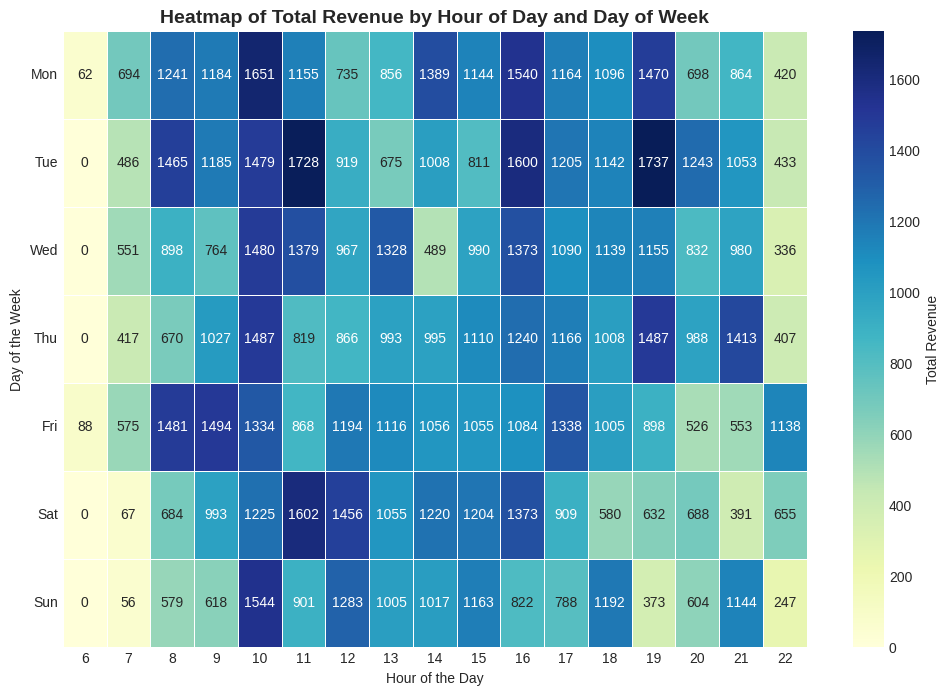

In [65]:
# Aggregate data by 'Weekday' and 'hour_of_day' and calculate the sum of 'money'
heatmap_data = df.groupby(['Weekday', 'hour_of_day'])['money'].sum().reset_index()

# Pivot the data: 'Weekday' as index and 'hour_of_day' as columns
heatmap_data_pivot = heatmap_data.pivot(index='Weekday', columns='hour_of_day', values='money')

# Ensure the correct weekday order
weekday_order = ['Mon', 'Tue', 'Wed', 'Thu', 'Fri', 'Sat', 'Sun']
heatmap_data_pivot = heatmap_data_pivot.reindex(weekday_order)

# Plot the heatmap
plt.style.use('seaborn-v0_8-whitegrid')
plt.figure(figsize=(12, 8))
sns.heatmap(
    heatmap_data_pivot,
    cmap='YlGnBu',   # Color scheme (darker = higher values)
    annot=True,      # Show values in each cell
    fmt='.0f',       # Integer formatting (no decimals)
    linewidths=.5,   # Add borders between cells
    cbar_kws={'label': 'Total Revenue'}  # Color bar label
)

# Customize labels and title
plt.title('Heatmap of Total Revenue by Hour of Day and Day of Week', fontsize=14, weight='bold')
plt.xlabel('Hour of the Day', fontsize=10)
plt.ylabel('Day of the Week', fontsize=10)
plt.xticks(rotation=0)
plt.yticks(rotation=0)
plt.show()


# **INSIGHTS**

In [105]:
#  Final Insight Report

print("=" * 50)
print("COFFEE SALES INSIGHT SUMMARY ")
print("=" * 50)

print(f"1. Top Coffee by Units Sold: {best_menu_qty}")
print(f"   Units sold: {best_menu_qty_count:,}")

print(f"\n2. Top Coffee by Revenue: {best_menu_rev}")
print(f"   Revenue: ${best_menu_rev_val:,.0f} USD")

print(f"\n3. Peak sales hour: {best_hour}:00 AM")
print(f"   Sales volume: ${best_sales:,.0f} USD")

print(f"\n4. Average daily sales: ${df.groupby('Date')['money'].sum().mean():,.0f} USD")
print(f"\n5. Total sales: ${df['money'].sum():,.0f} USD")

print(f"\n6. Highest daily sales (weekday): {best_weekday}")
print(f"   Revenue: ${best_weekday_sales:,.0f} USD")

print(f"\n7. Month with highest sales: {best_month}")
print(f"   Revenue: ${sales_by_month.max():,.0f} USD")

print(f"\n8. Top Revenue Period: {peak_period}")
print(f"   Total Sales: ${peak_sales:,.2f} USD")


COFFEE SALES INSIGHT SUMMARY 
1. Top Coffee by Units Sold: Americano with Milk
   Units sold: 809

2. Top Coffee by Revenue: Latte
   Revenue: $26,875 USD

3. Peak sales hour: 10:00 AM
   Sales volume: $10,199 USD

4. Average daily sales: $295 USD

5. Total sales: $112,246 USD

6. Highest daily sales (weekday): Tue
   Revenue: $18,168 USD

7. Month with highest sales: Mar
   Revenue: $15,892 USD

8. Top Revenue Period: Night
   Total Sales: $38,186.34 USD
